In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing dataset
df=pd.read_csv('Car Talk Community.csv')
df.head()

Unnamed: 0                                    Title             Category  \
0           0     Cooling System Stop Leak hot engine?  Maintenance/Repairs   
1           1  Coolant System Bubble Removal Procedure  Maintenance/Repairs   
2           2                   Expensive Volvo Repair   General Discussion   
3           3      2005 Ford Taurus - Will 6’ 10” fit?  Maintenance/Repairs   
4           4    2006 BMW Z4 - Dear Cat Talk is missed             The Show   

   Replies Views                                           Comments  
0        9   317  Hi there, I have some small leaks in my coolin...  
1        1    40  Hi I have a quick question. I have to use spec...  
2       61  1.3k  To reinforce the advice so many here give abou...  
3       20   414  I need to know if a 2005 Taurus SE has enough ...  
4        6   292  Why don’t we have any new Dear Car Talk letter...

Text(0, 0.5, 'no of posts')

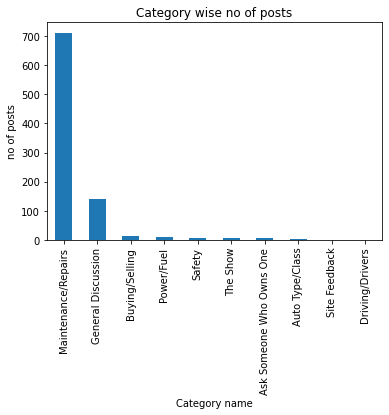

In [2]:
df['Category'].value_counts().plot.bar()
# Add title and axis names
plt.title('Category wise no of posts')
plt.xlabel('Category name')
plt.ylabel('no of posts')

**We can see a Large Category Imbalance.Maintenance/Repairs category has most no of posts **

In [3]:
df['Replies'].describe()

count    899.000000
mean      14.222469
std       40.124077
min        0.000000
25%        3.000000
50%        7.000000
75%       15.000000
max      766.000000
Name: Replies, dtype: float64

**some posts have large no of replies.**

In [4]:
df['Views'].describe()

count      899
unique     484
top       1.1k
freq        10
Name: Views, dtype: object

In [5]:
df['word_count'] = df['Comments'].apply(lambda x: len(str(x).split(" "))) ##to calculate word count 
df['char_count'] = df['Comments'].str.len() ## this also includes spaces
#to calculate avg word
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Comments'].apply(lambda x: avg_word(x))
#for stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Comments'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Comments','word_count','char_count','avg_word','stopwords']].head()

Comments  word_count  char_count  \
0  Hi there, I have some small leaks in my coolin...         472        2554   
1  Hi I have a quick question. I have to use spec...         187        1043   
2  To reinforce the advice so many here give abou...        2088       11220   
3  I need to know if a 2005 Taurus SE has enough ...         701        3765   
4  Why don’t we have any new Dear Car Talk letter...         187        1051   

   avg_word  stopwords  
0  4.417910        198  
1  4.602151         69  
2  4.339722        866  
3  4.272984        294  
4  4.244898         71

In [6]:
Compare=df.loc[:,['word_count','stopwords']]
Compare.describe()

word_count    stopwords
count   899.000000   899.000000
mean    582.520578   236.496107
std     590.750885   243.598210
min       3.000000     0.000000
25%     133.500000    50.500000
50%     392.000000   162.000000
75%     875.500000   357.000000
max    7332.000000  3074.000000

**Many Stop words, which means that we  should not remove stop words when doing data cleaning**

In [7]:
#Lowercase the reviews
df['cleaned']=df['Comments'].apply(lambda x: x.lower())
#Remove digits and words containing digits
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
#Remove Punctuations
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

for index,text in enumerate(df['cleaned'][0:]):
    print('\n\nPost %d:\n '%(index+1),text)



Post 1:
  hi there i have some small leaks in my cooling system so i ordered the wynn’s cooling system stop leak product httpswwwwynnseuproductcoolingsystemstopleak it says on that website i should bring the engine up to temperature and then pour the liquid into the cooling system via the radiator cap however i am always told you should never ever ever open the radiator cap while the engine is hot let alone running am i reading something wrong or should i really do that
thanks…

leave the radiator cap off while you run the engine for a short time you will be fine


these miracle in a jug fixes may or may not work even if this stuff works it may fail in short order can you locate and fix the leak

alright so take the cap of before starting the engine wait a few minutes until it gets warm pour the stuff in put the cap back on let the engine run a few minutes and that’s it
it is not one clear leak but various small leaks i suppose because the leaking coolant though not dripping or flowi

In [8]:
## 25 Common word removal
freq = pd.Series(' '.join(df['cleaned']).split()).value_counts()[:25]
freq

the     30708
a       14802
to      13674
and     11724
i       10515
it       9603
is       7654
of       7004
that     6747
you      6291
in       6178
on       5219
for      4798
have     4173
not      3734
with     3692
be       3596
if       3549
was      3443
car      3425
but      3147
this     3084
my       3020
or       2968
are      2658
dtype: int64

In [9]:
freq = list(freq.index)
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['cleaned'].head()

0    hi there some small leaks cooling system so or...
1    hi quick question use specially formulated bmw...
2    reinforce advice so many here give about buyin...
3    need know taurus se has enough head legroom ’ ...
4    why don’t we any new dear talk letters neilthe...
Name: cleaned, dtype: object

In [10]:
##15 Rare words removal
rare = pd.Series(' '.join(df['cleaned']).split()).value_counts()[-15:]
rare

startoh           1
taunt             1
viablecredible    1
straightness      1
pairsdo           1
wdagosa           1
sunnythese        1
favs              1
whip              1
nt                1
admits            1
efficiencies      1
zombielike        1
themmy            1
gasketsseals      1
dtype: int64

In [11]:
rare = list(rare.index)
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df['cleaned'].head()

0    hi there some small leaks cooling system so or...
1    hi quick question use specially formulated bmw...
2    reinforce advice so many here give about buyin...
3    need know taurus se has enough head legroom ’ ...
4    why don’t we any new dear talk letters neilthe...
Name: cleaned, dtype: object

In [12]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [13]:
df_grouped=df[['Category','lemmatized']].groupby(by='Category').agg(lambda x:' '.join(x))
df_grouped

lemmatized
Category                                                                   
Ask Someone Who Owns One  heater not biow hpt airthere couple possibilit...
Auto Type/Class           wife belove bmw convertible love separate issu...
Buying/Selling            × kb look buy ' dl door find los angeles pass ...
Driving/Drivers           go nee help lot help mission fly california fr...
General Discussion        reinforce advice buy european vehicle time bes...
Maintenance/Repairs       hi small leak cool system order wynn cool syst...
Power/Fuel                yesterday mercedes start crank like crazy fire...
Safety                    mr boyd alan s boyd nations transportation chi...
Site Feedback             happen site make impossible use pop ad appear ...
The Show                  new dear talk letter neilthe air year tommy pa...

In [14]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm

aa  aaa  aaacom  aamco  aamcorecheck  aamcosooo  \
Category                                                                    
Ask Someone Who Owns One   0    0       0      0             0          0   
Auto Type/Class            0    0       0      0             0          0   
Buying/Selling             0    0       0      0             0          0   
Driving/Drivers            0    0       0      0             0          0   
General Discussion         1   11       1      0             0          0   
Maintenance/Repairs        0   22       1      9             1          1   
Power/Fuel                 0    0       0      0             0          0   
Safety                     0    0       0      0             0          0   
Site Feedback              0    0       0      0             0          0   
The Show                   0    0       0      0             0          0   

                          aap  aas  abandon  abatement  ...  δεκ  οη  πμ  σάβ  \
Category                                                ...                     
Ask Someone Who Owns One    0    0        0          0  ...    0   0   0    0   
Auto Type/Class             0    0        0          0  ...    0   0   0    0   
Buying/Selling              0    0        1          0  ...    0   0   0    0   
Driving/Drivers             0    0        0          0  ...    0   0   0    0   
General Discussion          0    1       12          1  ...    0   0   0    0   
Maintenance/Repairs         3    0        3          0  ...    1   1   1    1   
Power/Fuel                  0    0        0          0  ...    0   0   0    0   
Safety                      0    0        0          0  ...    0   0   0    0   
Site Feedback               0    0        0          0  ...    0   0   0    0   
The Show                    0    0        0          0  ...    0   0   0    0   

                          στις  снимок  экрана  きいちろう  とよだ  喜一郎  
Category                                                         
Ask Someone Who Owns One     0       0       0      0    0    0  
Auto Type/Class              0       0       0      0    0    0  
Buying/Selling               0       1       1      0    0    0  
Driving/Drivers              0       0       0      0    0    0  
General Discussion           0       0       0      1    1    1  
Maintenance/Repairs          2       0       0      0    0    0  
Power/Fuel                   0       0       0      0    0    0  
Safety                       0       0       0      0    0    0  
Site Feedback                0       0       0      0    0    0  
The Show                     0       0       0      0    0    0  

[10 rows x 18730 columns]

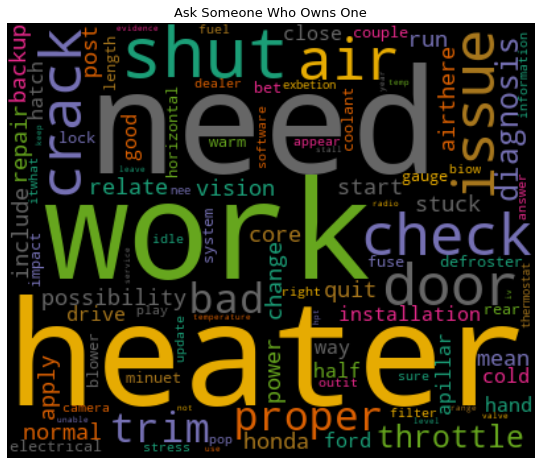

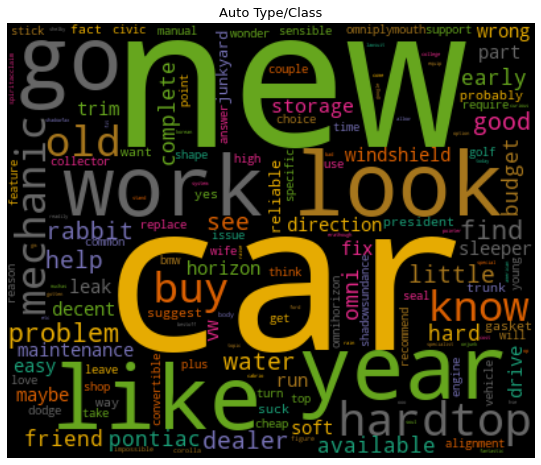

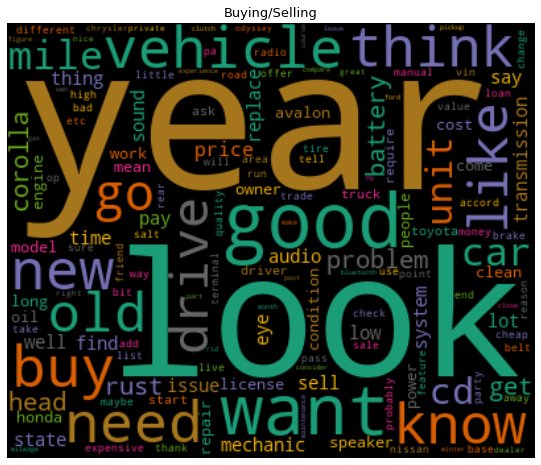

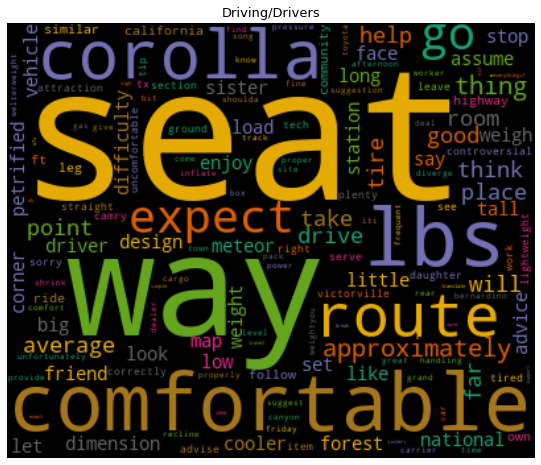

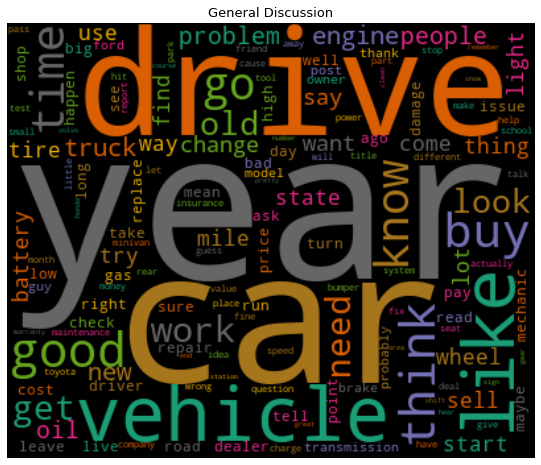

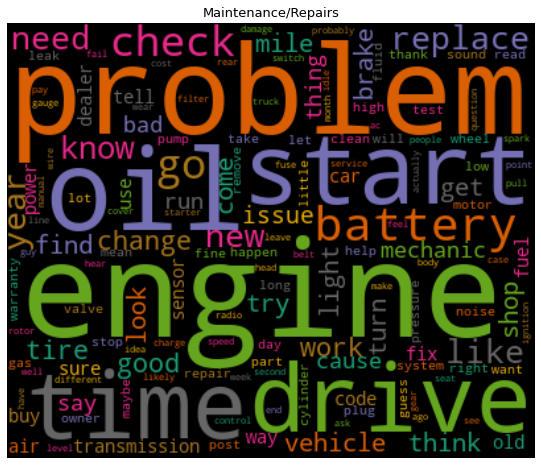

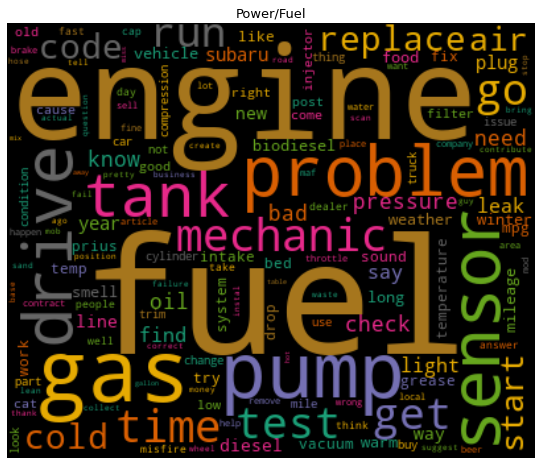

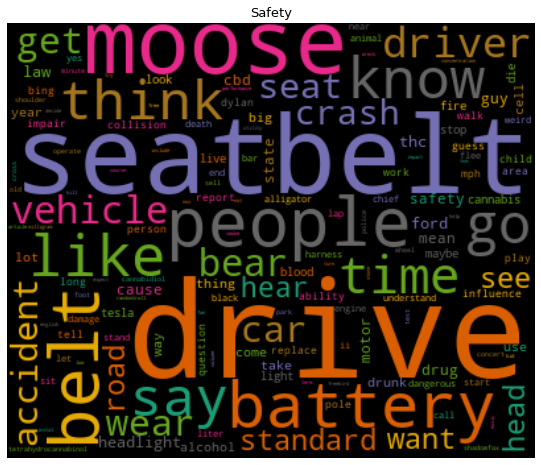

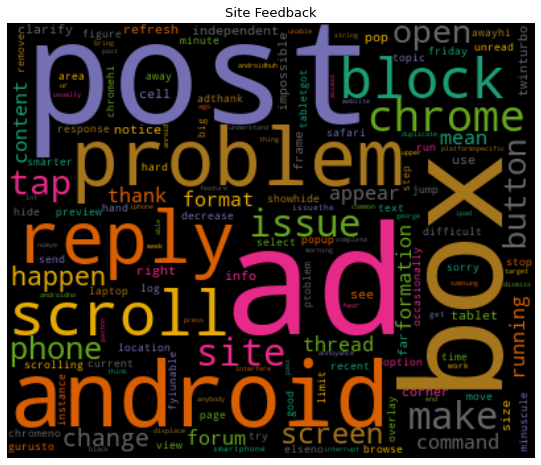

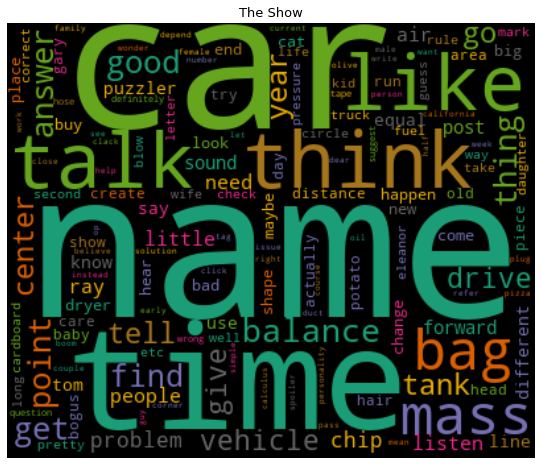

In [15]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
  
#  Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each category
for index,category in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[category].sort_values(ascending=False),category)

In [16]:
# checking only the polarity
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [17]:
print("3 Random comments with Highest Polarity:")
for index,comment in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['Comments']):
    print('Comment {}: '.format(index+1),comment)

3 Random comments with Highest Polarity:
Comment 1:  Passenger window on 2006 scion will not go back up. 2nd Time in a month First time took it to shop Don’t know what the problem was or what they did to Fix the problemSimple , go back to the shop and see if they have a warranty on their work .


 Kim06:

Don’t know what the problem was or what they did to Fix the problem


What would you like us to do? If you have a question, please ask. Otherwise, @VOLVO-V70 gave you good advice.See if the 20 amp fuse for the passenger power window is blown.
Tester
Comment 2:  This is truly amazing, IMHO:
Amazon Zoox unveils self-driving robotaxi (cnbc.com) 15
Comment 3:  I own a 2007 X3,   I HAVE NOTICED WATER ACCUMULATION IN THE FLOOR OF THE DRIVER SIDE REAR SEAT.  PLEASE GIVE ME SOME ADVICE BEFORE I TAKE IT TO THE REPAIR SHOP


 SANDY48:

PLEASE GIVE ME SOME ADVICE BEFORE I TAKE IT TO THE REPAIR SHOP


Just let the shop find the problem , that is what you pay them for . If I said it was a door sea

In [18]:
print("3 Random Reviews with Lowest Polarity:")
for index,comment in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['Comments']):
    print('Comment {}: '.format(index+1),comment)

3 Random Reviews with Lowest Polarity:
Comment 1:  Dust in cab terrible dealer says doors sealing any ideasDoes it have a cabin air filter?  Is the filter missing?


 Groundponder:

dealer says doors sealing


Well, then, tell the dealer to FIX the door seals as the truck is still under warranty.
Comment 2:  heat will not come out on the passenger side what needs to be doneMy first thought would be a bad blend door actuator
Comment 3:  I can’t get the heater on.It doesn’t blow or blows cold air?


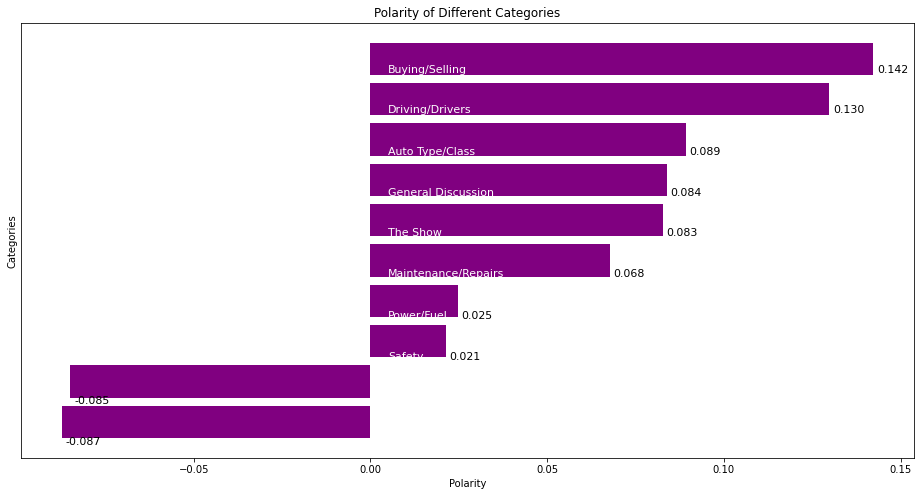

In [19]:
category_polarity_sorted=pd.DataFrame(df.groupby('Category')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Categories')
plt.title('Polarity of Different Categories')
polarity_graph=plt.barh(np.arange(len(category_polarity_sorted.index)),category_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,category in zip(polarity_graph,category_polarity_sorted.index):
    plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(category),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,category_polarity_sorted['polarity']):
    plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

**Site Feedback & The show These 2 categories have negative polarities**